## 1. TITANIC SURVIVAL PREDICTION

In [100]:
import pandas as pd
df = pd.read_csv('/kaggle/input/titanic-data/tested.csv')
print(df.shape)
df.head()


(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
# viewing unique values in columns
for columns in df:
    print(f"{columns}:{df[columns].nunique()}")

PassengerId:418
Survived:2
Pclass:3
Name:418
Sex:2
Age:79
SibSp:7
Parch:8
Ticket:363
Fare:169
Cabin:76
Embarked:3


In [102]:
#descibe numeric values
df.describe().T.style.background_gradient(cmap='Set2')

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.000000,1100.500000,120.810458,892.000000,996.250000,1100.500000,1204.750000,1309.000000
Survived,418.000000,0.363636,0.481622,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,418.000000,2.265550,0.841838,1.000000,1.000000,3.000000,3.000000,3.000000
Age,332.000000,30.272590,14.181209,0.170000,21.000000,27.000000,39.000000,76.000000
SibSp,418.000000,0.447368,0.896760,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,418.000000,0.392344,0.981429,0.000000,0.000000,0.000000,0.000000,9.000000
Fare,417.000000,35.627188,55.907576,0.000000,7.895800,14.454200,31.500000,512.329200


In [103]:
# describe string values
df.describe(include='object').T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [104]:
# Null values %age
(df.isnull().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [105]:
df.groupby(['Age']).sum()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.17,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,1,2,C.A. 2315,20.5750,0,S
0.33,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0,2,347080,14.4000,0,S
0.75,1173,0,3,"Peacock, Master. Alfred Edward",male,1,1,SOTON/O.Q. 3101315,13.7750,0,S
0.83,1199,0,3,"Aks, Master. Philip Frank",male,0,1,392091,9.3500,0,S
0.92,1142,1,2,"West, Miss. Barbara J",female,1,2,C.A. 34651,27.7500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
62.00,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,0,Q
63.00,1911,1,3,"Howard, Mr. BenjaminStraus, Mrs. Isidor (Rosal...",malefemale,2,0,24065PC 17483,247.7792,C55 C57,SS
64.00,3396,2,3,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",femalemalefemale,2,3,PC 17756110813112901,184.9583,E45D37B26,CCS


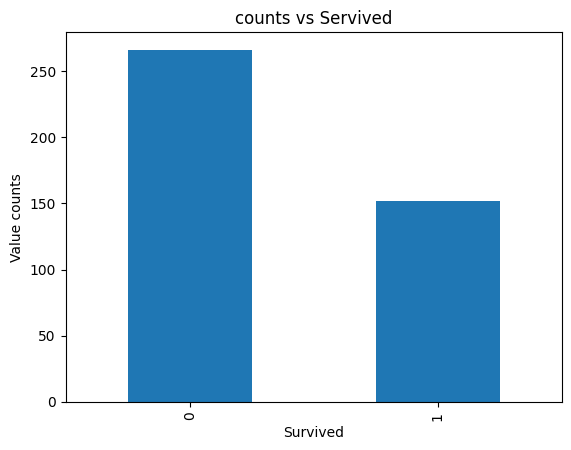

In [106]:
import matplotlib.pyplot as plt
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Value counts')
plt.title('counts vs Servived');

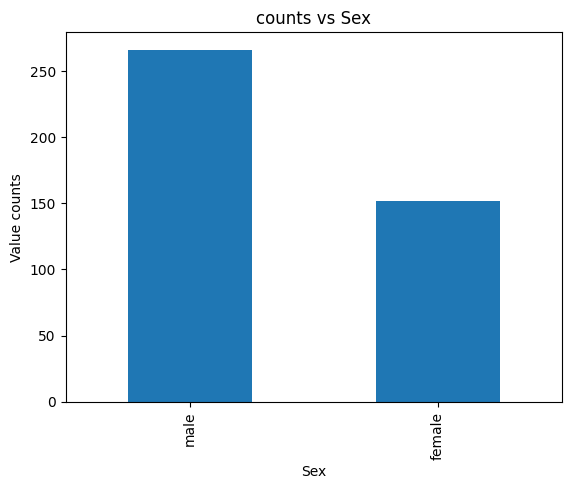

In [107]:
import matplotlib.pyplot as plt
df['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Value counts')
plt.title('counts vs Sex');

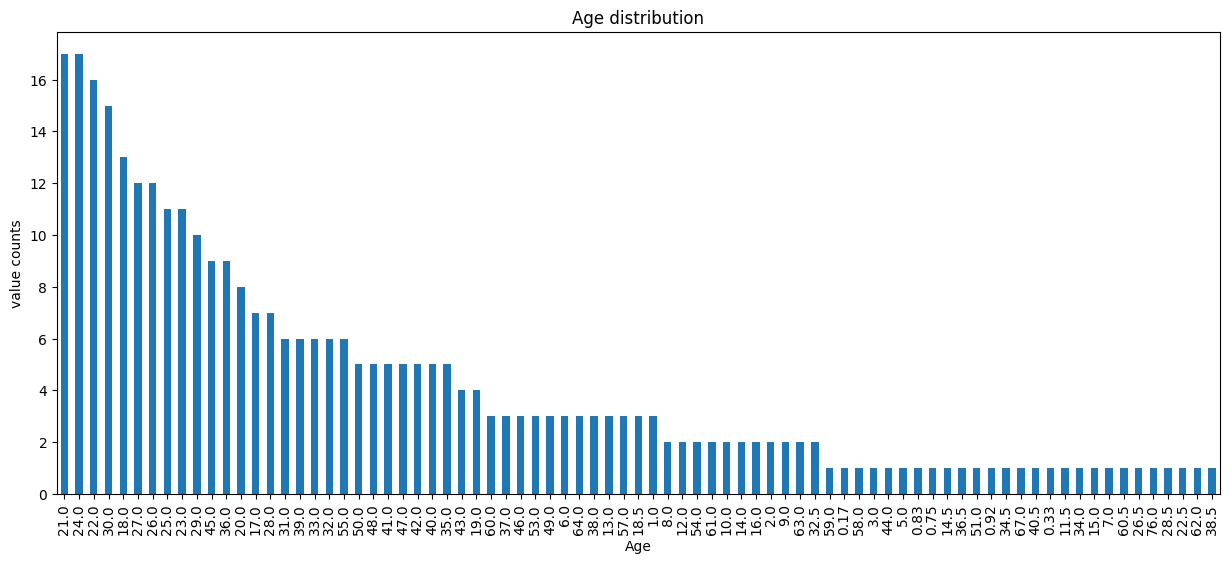

In [108]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,6))
df['Age'].value_counts(ascending=False).plot(ax=ax,kind='bar')
plt.xticks(rotation='vertical')
plt.xlabel('Age')
plt.ylabel('value counts')
plt.title('Age distribution') 
plt.show()

In [109]:
# removing columns
df.drop(columns=['Cabin','PassengerId','Name','Ticket'],inplace=True)

In [110]:
# viewing unique values in columns
for columns in df:
    print(f"{columns}:{df[columns].nunique()}")
    
print(df.isnull().sum())
    
print(df.head())

Survived:2
Pclass:3
Sex:2
Age:79
SibSp:7
Parch:8
Fare:169
Embarked:3
Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S


In [111]:
#filling nan values by mean
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='median')
df[['Age','Fare']] = si.fit_transform(df[['Age','Fare']])
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [112]:
# label encoding 0,1,2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])
df.Embarked.unique()

array([1, 2, 0])

In [113]:
# scale the dimensions of age and fare to range 0-1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Age','Fare']]=scaler.fit_transform(df[['Age','Fare']])
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.452723,0,0,0.015282,1


## Split

In [143]:
target='Survived'
X=df.drop(columns=target)
y=df[target]
print(X.head(1))
print(y.head(1))

   Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       3    1  0.452723      0      0  0.015282         1
0    0
Name: Survived, dtype: int64


In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_val))

300
84
34


## Model

In [116]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(6,input_shape=(7,),activation= 'relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=80)

Epoch 1/80
10/10 [==============================] - 1s 4ms/step - loss: 0.6955 - accuracy: 0.3500
Epoch 2/80
10/10 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.4467
Epoch 3/80
10/10 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6533
Epoch 4/80
10/10 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.6933
Epoch 5/80
10/10 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6967
Epoch 6/80
10/10 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6933
Epoch 7/80
10/10 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.7033
Epoch 8/80
10/10 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.7167
Epoch 9/80
10/10 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.7367
Epoch 10/80
10/10 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.7533
Epoch 11/80
10/10 [

In [117]:
model.evaluate(X_train,y_train)

10/10 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 1.0000


[0.009923514910042286, 1.0]

## prediction

In [118]:
# predict X_test
y_prediction=model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [119]:
# making 2d array to 1d array
y_pred=[]
for pred in y_prediction:
    if pred < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [132]:
# evaluation to check manaully y_train and y_predict sets
print(y_pred[11:20])
print(y_test[11:20])

[1, 1, 1, 0, 0, 1, 0, 0, 0]
391    1
104    1
414    1
413    0
39     0
412    1
378    0
55     0
406    0
Name: Survived, dtype: int64


## Accuracy of test data

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

1.0


## Confusion Metrix

<Axes: >

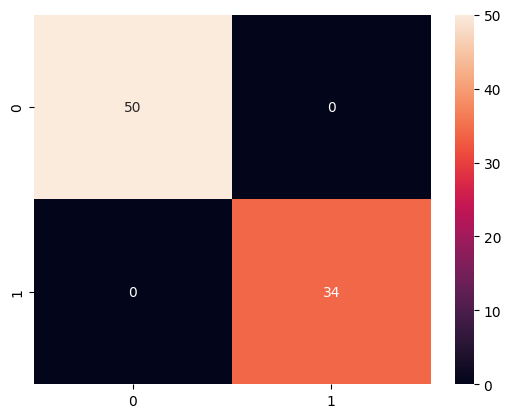

In [134]:
import seaborn as sns
cm=tf.math.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

## For Validation Set

In [135]:
y_val_prediction=model.predict(X_val)
y_val_pred=[]
for prediction in y_val_prediction:
    if prediction < 0.5:
        y_val_pred.append(0)
    else:
        y_val_pred.append(1)
print(y_val_pred[:5])
print(y_val[:5])

2/2 [==============================] - 0s 4ms/step
[1, 0, 0, 0, 0]
63     1
276    0
139    0
142    0
407    0
Name: Survived, dtype: int64


## Accuracy of validation data

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_val_pred,y_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        11

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



## Confusion Metrix

<Axes: >

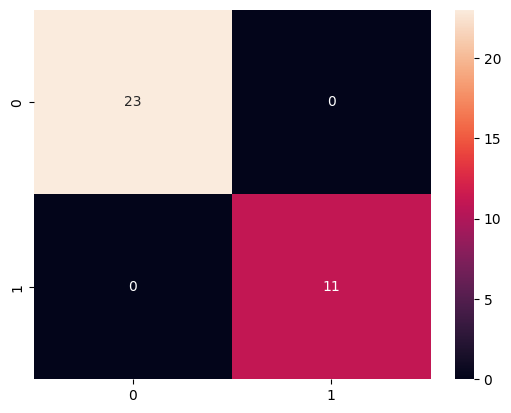

In [127]:
import seaborn as sns
cm=tf.math.confusion_matrix(y_val,y_val_pred)
sns.heatmap(cm,annot=True,fmt='d')

## Cross Validation

In [137]:
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Define a function to create your Keras model
def create_model():
    # Build and compile your Keras Sequential model here
    model=keras.Sequential([

        keras.layers.Dense(6,input_shape=(7,),activation= 'relu'),
        keras.layers.Dense(4,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for your model
keras_wrapper = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32)

# Use the wrapper with scikit-learn functions
scores = cross_val_score(keras_wrapper, X, y, cv=8)
print(f"('Accuracy':{np.average(scores)})")

Epoch 1/50


/tmp/ipykernel_28/2286692939.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_wrapper = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32)


12/12 [==============================] - 1s 4ms/step - loss: 0.5851 - accuracy: 0.6411
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.6438
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.6493
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.6603
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.6904
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7014
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.7096
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.7205
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7288
Epoch 10/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7397
Epoch 11/50
12/12 [===========